In [1]:
# imports 
import numpy as np
from math import sqrt 
from pprint import pprint
from numpy import array
import pandas as pd
from time import time

from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# load data
df=pd.read_csv('UNSW_2018_IoT_Botnet_Final_10_Best.csv',sep=";")  

del df['Unnamed: 0']
#df['outlier'] = df.outlier.apply(lambda label: 1 if label == "'yes'" else 0)

df.head()

,pkSeqID,proto,saddr,sport,daddr,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,category,subcategory
0,1,tcp,192.168.100.147,49960,192.168.100.7,80,9,0.068909,75,0.000000,1,0.068909,96,14.511893,0.566862,0.137818,1,DoS,HTTP
1,2,arp,192.168.100.7,-1,192.168.100.147,-1,10,0.000000,2,0.000131,2,0.000131,1,0.000000,0.000000,0.000131,1,DoS,HTTP
2,3,tcp,192.168.100.147,49962,192.168.100.7,80,11,0.064494,75,0.000000,1,0.064494,96,15.505319,0.567549,0.128988,1,DoS,HTTP
3,4,tcp,192.168.100.147,49964,192.168.100.7,80,12,0.064189,75,0.000000,1,0.064189,96,15.578993,0.567570,0.128378,1,DoS,HTTP
4,5,tcp,192.168.100.147,49966,192.168.100.7,80,13,0.063887,75,0.000000,1,0.063887,96,15.652637,0.567630,0.127774,1,DoS,HTTP


In [4]:
df = df.sample(frac=1)

df.shape

(3668522, 19)

In [5]:
df.columns = df.columns.to_series().apply(lambda x: x.strip())
df = df.reset_index(drop=True)

# General Information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3668522 entries, 0 to 3668521
Data columns (total 19 columns):
 #   Column             Dtype  
---  ------             -----  
 0   pkSeqID            int64  
 1   proto              object 
 2   saddr              object 
 3   sport              object 
 4   daddr              object 
 5   dport              object 
 6   seq                int64  
 7   stddev             float64
 8   N_IN_Conn_P_SrcIP  int64  
 9   min                float64
 10  state_number       int64  
 11  mean               float64
 12  N_IN_Conn_P_DstIP  int64  
 13  drate              float64
 14  srate              float64
 15  max                float64
 16  attack             int64  
 17  category           object 
 18  subcategory        object 
dtypes: float64(6), int64(6), object(7)
memory usage: 531.8+ MB


# Exploratory Data Analysis

In [6]:
df.describe()

,pkSeqID,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack
count,3.668522e+06,3.668522e+06,3.668522e+06,3.668522e+06,3.668522e+06,3.668522e+06,3.668522e+06,3.668522e+06,3.668522e+06,3.668522e+06,3.668522e+06,3.668522e+06
mean,1.834262e+06,1.213204e+05,8.871499e-01,8.253848e+01,1.017540e+00,3.134390e+00,2.231063e+00,9.245168e+01,4.455046e-01,2.955111e+00,3.020015e+00,9.998700e-01
std,1.059011e+06,7.579428e+04,8.037139e-01,2.439739e+01,1.483688e+00,1.186971e+00,1.517728e+00,1.817643e+01,6.028863e+01,7.245425e+02,1.860877e+00,1.140212e-02
min,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,9.171312e+05,5.487600e+04,3.001900e-02,6.900000e+01,0.000000e+00,3.000000e+00,1.819670e-01,1.000000e+02,0.000000e+00,1.559700e-01,2.806072e-01,1.000000e+00
50%,1.834262e+06,1.177690e+05,7.938960e-01,1.000000e+02,0.000000e+00,4.000000e+00,2.690125e+00,1.000000e+02,0.000000e+00,2.837830e-01,4.009111e+00,1.000000e+00
75%,2.751392e+06,1.849300e+05,1.745296e+00,1.000000e+02,2.151138e+00,4.000000e+00,3.565203e+00,1.000000e+02,0.000000e+00,4.882010e-01,4.293582e+00,1.000000e+00
max,3.668522e+06,2.622120e+05,2.496763e+00,1.000000e+02,4.980471e+00,1.100000e+01,4.981882e+00,1.000000e+02,5.882353e+04,1.000000e+06,4.999999e+00,1.000000e+00


# Extracting 10 best features

In [7]:
ten_best_features = df[['seq','stddev','N_IN_Conn_P_SrcIP', 'min', 'state_number', 'mean', 'N_IN_Conn_P_DstIP',
       'drate', 'srate', 'max','attack']]
#target_features = df[['attack','category','subcategory']]

# Data Preprocessing


In [8]:
# Label Encoding the target columns

#le = LabelEncoder()
#target_features['category'] = le.fit_transform(target_features['category'])
#target_features['subcategory'] = le.fit_transform(target_features['subcategory'])

#target_features.head()

# attack

In [9]:
from sklearn.model_selection import train_test_split

ten_best_features = ten_best_features.values

y = ten_best_features[:,10]
X = ten_best_features[:,0:10]

# Train-test Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)


# Scaling the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
# number of class
len(np.unique(y_train))

2

# Extratrees Deep

In [11]:
# Extratrees Deep
import argparse
import sys
import pickle
from sklearn.metrics import accuracy_score
sys.path.insert(0, "lib")
from gcforest.gcforest import GCForest
from gcforest.utils.config_utils import load_json
config = load_json("./examples/aloi.json")
gc = GCForest(config)

In [12]:
# X_enc is the concatenated predict_proba result of DeepExtraTrees
X_train_enc, X_test_enc = gc.fit_transform(X_train, y_train, X_test=X_test, y_test=y_test)

[ 2023-01-06 20:57:37,208][cascade_classifier.fit_transform] X_groups_train.shape=[(2567965, 10)],y_train.shape=(2567965,),X_groups_test.shape=[(1100557, 10)],y_test.shape=(1100557,)
[ 2023-01-06 20:57:37,314][cascade_classifier.fit_transform] group_dims=[10]
[ 2023-01-06 20:57:37,316][cascade_classifier.fit_transform] group_starts=[0]
[ 2023-01-06 20:57:37,317][cascade_classifier.fit_transform] group_ends=[10]
[ 2023-01-06 20:57:37,318][cascade_classifier.fit_transform] X_train.shape=(2567965, 10),X_test.shape=(1100557, 10)
[ 2023-01-06 20:57:37,460][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(2567965, 10), X_cur_test.shape=(1100557, 10)
[ 2023-01-06 20:58:02,768][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=100.00%
[ 2023-01-06 20:58:29,094][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2023-01-06 20:58:55,286][kfold_wrapper.log_eval_metrics] Accura

In [13]:
# predict
y_pred = gc.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Test Accuracy of DeepExtratTrees = {:.6f} %".format(acc * 100))
 # Matrix de confusion
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))
# Make data + estimators
X_test_enc = gc.transform(X_test)
X_train_enc = X_train_enc.reshape((X_train_enc.shape[0], -1))
X_test_enc = X_test_enc.reshape((X_test_enc.shape[0], -1))
X_train_origin = X_train.reshape((X_train.shape[0], -1))
X_test_origin = X_test.reshape((X_test.shape[0], -1))
X_train_enc = np.hstack((X_train_origin, X_train_enc))
X_test_enc = np.hstack((X_test_origin, X_test_enc))

# New data
X_train=X_train_enc
X_test=X_test_enc 
X_train_enc, X_test_enc = gc.fit_transform(X_train, y_train, X_test=X_test, y_test=y_test)

# predict  data + Es
y_pred = gc.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Test Accuracy of DeepExtratTrees = {:.6f} %".format(acc * 100))
 # Matrix de confusion
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

[ 2023-01-06 21:02:05,608][cascade_classifier.transform] X_groups_test.shape=[(1100557, 10)]
[ 2023-01-06 21:02:05,659][cascade_classifier.transform] group_dims=[10]
[ 2023-01-06 21:02:05,661][cascade_classifier.transform] X_test.shape=(1100557, 10)
[ 2023-01-06 21:02:05,704][cascade_classifier.transform] [layer=0] look_indexs=[0], X_cur_test.shape=(1100557, 10)


Test Accuracy of DeepExtratTrees = 99.999455 %
[[    131       5]
 [      1 1100420]]




[ 2023-01-06 21:02:28,421][cascade_classifier.transform] X_groups_test.shape=[(1100557, 10)]
[ 2023-01-06 21:02:28,440][cascade_classifier.transform] group_dims=[10]
[ 2023-01-06 21:02:28,440][cascade_classifier.transform] X_test.shape=(1100557, 10)
[ 2023-01-06 21:02:28,471][cascade_classifier.transform] [layer=0] look_indexs=[0], X_cur_test.shape=(1100557, 10)


              precision    recall  f1-score   support

         0.0       0.99      0.96      0.98       136
         1.0       1.00      1.00      1.00   1100421

    accuracy                           1.00   1100557
   macro avg       1.00      0.98      0.99   1100557
weighted avg       1.00      1.00      1.00   1100557



[ 2023-01-06 21:02:48,158][cascade_classifier.fit_transform] X_groups_train.shape=[(2567965, 12)],y_train.shape=(2567965,),X_groups_test.shape=[(1100557, 12)],y_test.shape=(1100557,)
[ 2023-01-06 21:02:48,348][cascade_classifier.fit_transform] group_dims=[12]
[ 2023-01-06 21:02:48,349][cascade_classifier.fit_transform] group_starts=[0]
[ 2023-01-06 21:02:48,350][cascade_classifier.fit_transform] group_ends=[12]
[ 2023-01-06 21:02:48,352][cascade_classifier.fit_transform] X_train.shape=(2567965, 12),X_test.shape=(1100557, 12)
[ 2023-01-06 21:02:48,618][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(2567965, 12), X_cur_test.shape=(1100557, 12)
[ 2023-01-06 21:03:11,951][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=100.00%
[ 2023-01-06 21:03:38,085][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2023-01-06 21:04:04,710][kfold_wrapper.log_eval_metrics] Accura

Test Accuracy of DeepExtratTrees = 99.999364 %
[[    131       5]
 [      2 1100419]]


              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97       136
         1.0       1.00      1.00      1.00   1100421

    accuracy                           1.00   1100557
   macro avg       0.99      0.98      0.99   1100557
weighted avg       1.00      1.00      1.00   1100557



In [14]:
def update(X_train,X_test):
    # update Estimators
    M = np.delete(X_train, (-1), axis=1)
    X_train= np.delete(M, (-1), axis=1)
    M = np.delete(X_test, (-1), axis=1)
    X_test = np.delete(M, (-1), axis=1)
    return X_train,X_test

def newdata(X_test_enc, X_train_enc):
    # Make Data + Estimators
    X_train_origin = X_train.reshape((X_train.shape[0], -1))
    X_test_origin = X_test.reshape((X_test.shape[0], -1))
    X_train_enc = np.hstack((X_train_origin, X_train_enc))
    X_test_enc = np.hstack((X_test_origin, X_test_enc))
    return X_test_enc, X_train_enc

Accuracy = []
def affiche():
    # predict
    y_pred = gc.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print("Test Accuracy of DeepExtratTrees = {:.6f} %".format(acc * 100),"Layer :",i)
    Accuracy.append(round(acc*100 , 2))
    # Matrix de confusion
    from sklearn.metrics import classification_report, confusion_matrix
    print(confusion_matrix(y_test,y_pred))
    print('\n')
    print(classification_report(y_test,y_pred))
    
# Deep
t = []
for i in range (20):
    t0 = time()
    X_train,X_test=update(X_train,X_test)
    X_test_enc, X_train_enc=newdata(X_test_enc, X_train_enc)

    X_train=X_train_enc
    X_test=X_test_enc 
    X_train_enc, X_test_enc = gc.fit_transform(X_train, y_train, X_test=X_test, y_test=y_test)
    tt = time() - t0
    affiche() 
    t.append(round(tt,2))
    print (" Time ",format(round(tt,3))," seconds")


[ 2023-01-06 21:07:36,103][cascade_classifier.fit_transform] X_groups_train.shape=[(2567965, 12)],y_train.shape=(2567965,),X_groups_test.shape=[(1100557, 12)],y_test.shape=(1100557,)
[ 2023-01-06 21:07:36,181][cascade_classifier.fit_transform] group_dims=[12]
[ 2023-01-06 21:07:36,181][cascade_classifier.fit_transform] group_starts=[0]
[ 2023-01-06 21:07:36,181][cascade_classifier.fit_transform] group_ends=[12]
[ 2023-01-06 21:07:36,181][cascade_classifier.fit_transform] X_train.shape=(2567965, 12),X_test.shape=(1100557, 12)
[ 2023-01-06 21:07:36,384][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(2567965, 12), X_cur_test.shape=(1100557, 12)
[ 2023-01-06 21:08:01,128][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=100.00%
[ 2023-01-06 21:08:30,613][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2023-01-06 21:08:58,528][kfold_wrapper.log_eval_metrics] Accura

Test Accuracy of DeepExtratTrees = 99.999364 % Layer : 0
[[    131       5]
 [      2 1100419]]


              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97       136
         1.0       1.00      1.00      1.00   1100421

    accuracy                           1.00   1100557
   macro avg       0.99      0.98      0.99   1100557
weighted avg       1.00      1.00      1.00   1100557

 Time  296.19  seconds


[ 2023-01-06 21:12:54,395][cascade_classifier.fit_transform] X_groups_train.shape=[(2567965, 12)],y_train.shape=(2567965,),X_groups_test.shape=[(1100557, 12)],y_test.shape=(1100557,)
[ 2023-01-06 21:12:54,488][cascade_classifier.fit_transform] group_dims=[12]
[ 2023-01-06 21:12:54,489][cascade_classifier.fit_transform] group_starts=[0]
[ 2023-01-06 21:12:54,490][cascade_classifier.fit_transform] group_ends=[12]
[ 2023-01-06 21:12:54,491][cascade_classifier.fit_transform] X_train.shape=(2567965, 12),X_test.shape=(1100557, 12)
[ 2023-01-06 21:12:54,641][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(2567965, 12), X_cur_test.shape=(1100557, 12)
[ 2023-01-06 21:13:21,738][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=100.00%
[ 2023-01-06 21:13:51,444][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2023-01-06 21:14:20,350][kfold_wrapper.log_eval_metrics] Accura

Test Accuracy of DeepExtratTrees = 99.999455 % Layer : 1
[[    131       5]
 [      1 1100420]]


              precision    recall  f1-score   support

         0.0       0.99      0.96      0.98       136
         1.0       1.00      1.00      1.00   1100421

    accuracy                           1.00   1100557
   macro avg       1.00      0.98      0.99   1100557
weighted avg       1.00      1.00      1.00   1100557

 Time  295.206  seconds


[ 2023-01-06 21:18:11,832][cascade_classifier.fit_transform] X_groups_train.shape=[(2567965, 12)],y_train.shape=(2567965,),X_groups_test.shape=[(1100557, 12)],y_test.shape=(1100557,)
[ 2023-01-06 21:18:11,911][cascade_classifier.fit_transform] group_dims=[12]
[ 2023-01-06 21:18:11,911][cascade_classifier.fit_transform] group_starts=[0]
[ 2023-01-06 21:18:11,911][cascade_classifier.fit_transform] group_ends=[12]
[ 2023-01-06 21:18:11,911][cascade_classifier.fit_transform] X_train.shape=(2567965, 12),X_test.shape=(1100557, 12)
[ 2023-01-06 21:18:12,067][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(2567965, 12), X_cur_test.shape=(1100557, 12)
[ 2023-01-06 21:18:39,451][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=100.00%
[ 2023-01-06 21:19:07,660][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2023-01-06 21:19:35,843][kfold_wrapper.log_eval_metrics] Accura

Test Accuracy of DeepExtratTrees = 99.999364 % Layer : 2
[[    130       6]
 [      1 1100420]]


              precision    recall  f1-score   support

         0.0       0.99      0.96      0.97       136
         1.0       1.00      1.00      1.00   1100421

    accuracy                           1.00   1100557
   macro avg       1.00      0.98      0.99   1100557
weighted avg       1.00      1.00      1.00   1100557

 Time  299.735  seconds


[ 2023-01-06 21:23:36,211][cascade_classifier.fit_transform] X_groups_train.shape=[(2567965, 12)],y_train.shape=(2567965,),X_groups_test.shape=[(1100557, 12)],y_test.shape=(1100557,)
[ 2023-01-06 21:23:36,305][cascade_classifier.fit_transform] group_dims=[12]
[ 2023-01-06 21:23:36,305][cascade_classifier.fit_transform] group_starts=[0]
[ 2023-01-06 21:23:36,305][cascade_classifier.fit_transform] group_ends=[12]
[ 2023-01-06 21:23:36,320][cascade_classifier.fit_transform] X_train.shape=(2567965, 12),X_test.shape=(1100557, 12)
[ 2023-01-06 21:23:36,477][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(2567965, 12), X_cur_test.shape=(1100557, 12)
[ 2023-01-06 21:24:07,680][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=100.00%
[ 2023-01-06 21:24:39,242][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2023-01-06 21:25:08,214][kfold_wrapper.log_eval_metrics] Accura

Test Accuracy of DeepExtratTrees = 99.999273 % Layer : 3
[[    129       7]
 [      1 1100420]]


              precision    recall  f1-score   support

         0.0       0.99      0.95      0.97       136
         1.0       1.00      1.00      1.00   1100421

    accuracy                           1.00   1100557
   macro avg       1.00      0.97      0.98   1100557
weighted avg       1.00      1.00      1.00   1100557

 Time  302.637  seconds


[ 2023-01-06 21:29:00,688][cascade_classifier.fit_transform] X_groups_train.shape=[(2567965, 12)],y_train.shape=(2567965,),X_groups_test.shape=[(1100557, 12)],y_test.shape=(1100557,)
[ 2023-01-06 21:29:00,782][cascade_classifier.fit_transform] group_dims=[12]
[ 2023-01-06 21:29:00,782][cascade_classifier.fit_transform] group_starts=[0]
[ 2023-01-06 21:29:00,782][cascade_classifier.fit_transform] group_ends=[12]
[ 2023-01-06 21:29:00,782][cascade_classifier.fit_transform] X_train.shape=(2567965, 12),X_test.shape=(1100557, 12)
[ 2023-01-06 21:29:00,954][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(2567965, 12), X_cur_test.shape=(1100557, 12)
[ 2023-01-06 21:29:30,155][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=100.00%
[ 2023-01-06 21:30:01,780][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2023-01-06 21:30:29,486][kfold_wrapper.log_eval_metrics] Accura

Test Accuracy of DeepExtratTrees = 99.999001 % Layer : 4
[[    127       9]
 [      2 1100419]]


              precision    recall  f1-score   support

         0.0       0.98      0.93      0.96       136
         1.0       1.00      1.00      1.00   1100421

    accuracy                           1.00   1100557
   macro avg       0.99      0.97      0.98   1100557
weighted avg       1.00      1.00      1.00   1100557

 Time  317.265  seconds


[ 2023-01-06 21:34:42,134][cascade_classifier.fit_transform] X_groups_train.shape=[(2567965, 12)],y_train.shape=(2567965,),X_groups_test.shape=[(1100557, 12)],y_test.shape=(1100557,)
[ 2023-01-06 21:34:42,215][cascade_classifier.fit_transform] group_dims=[12]
[ 2023-01-06 21:34:42,216][cascade_classifier.fit_transform] group_starts=[0]
[ 2023-01-06 21:34:42,218][cascade_classifier.fit_transform] group_ends=[12]
[ 2023-01-06 21:34:42,219][cascade_classifier.fit_transform] X_train.shape=(2567965, 12),X_test.shape=(1100557, 12)
[ 2023-01-06 21:34:42,365][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(2567965, 12), X_cur_test.shape=(1100557, 12)
[ 2023-01-06 21:35:10,767][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=100.00%
[ 2023-01-06 21:35:41,138][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2023-01-06 21:36:15,391][kfold_wrapper.log_eval_metrics] Accura

Test Accuracy of DeepExtratTrees = 99.999001 % Layer : 5
[[    126      10]
 [      1 1100420]]


              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96       136
         1.0       1.00      1.00      1.00   1100421

    accuracy                           1.00   1100557
   macro avg       1.00      0.96      0.98   1100557
weighted avg       1.00      1.00      1.00   1100557

 Time  320.954  seconds


[ 2023-01-06 21:40:25,372][cascade_classifier.fit_transform] X_groups_train.shape=[(2567965, 12)],y_train.shape=(2567965,),X_groups_test.shape=[(1100557, 12)],y_test.shape=(1100557,)
[ 2023-01-06 21:40:25,455][cascade_classifier.fit_transform] group_dims=[12]
[ 2023-01-06 21:40:25,456][cascade_classifier.fit_transform] group_starts=[0]
[ 2023-01-06 21:40:25,457][cascade_classifier.fit_transform] group_ends=[12]
[ 2023-01-06 21:40:25,459][cascade_classifier.fit_transform] X_train.shape=(2567965, 12),X_test.shape=(1100557, 12)
[ 2023-01-06 21:40:25,616][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(2567965, 12), X_cur_test.shape=(1100557, 12)
[ 2023-01-06 21:40:57,530][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=100.00%
[ 2023-01-06 21:41:31,042][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2023-01-06 21:42:04,605][kfold_wrapper.log_eval_metrics] Accura

Test Accuracy of DeepExtratTrees = 99.998910 % Layer : 6
[[    126      10]
 [      2 1100419]]


              precision    recall  f1-score   support

         0.0       0.98      0.93      0.95       136
         1.0       1.00      1.00      1.00   1100421

    accuracy                           1.00   1100557
   macro avg       0.99      0.96      0.98   1100557
weighted avg       1.00      1.00      1.00   1100557

 Time  316.112  seconds


[ 2023-01-06 21:46:03,841][cascade_classifier.fit_transform] X_groups_train.shape=[(2567965, 12)],y_train.shape=(2567965,),X_groups_test.shape=[(1100557, 12)],y_test.shape=(1100557,)
[ 2023-01-06 21:46:03,920][cascade_classifier.fit_transform] group_dims=[12]
[ 2023-01-06 21:46:03,920][cascade_classifier.fit_transform] group_starts=[0]
[ 2023-01-06 21:46:03,920][cascade_classifier.fit_transform] group_ends=[12]
[ 2023-01-06 21:46:03,920][cascade_classifier.fit_transform] X_train.shape=(2567965, 12),X_test.shape=(1100557, 12)
[ 2023-01-06 21:46:04,045][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(2567965, 12), X_cur_test.shape=(1100557, 12)
[ 2023-01-06 21:46:33,311][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=100.00%
[ 2023-01-06 21:47:03,790][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2023-01-06 21:47:32,480][kfold_wrapper.log_eval_metrics] Accura

Test Accuracy of DeepExtratTrees = 99.999001 % Layer : 7
[[    126      10]
 [      1 1100420]]


              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96       136
         1.0       1.00      1.00      1.00   1100421

    accuracy                           1.00   1100557
   macro avg       1.00      0.96      0.98   1100557
weighted avg       1.00      1.00      1.00   1100557

 Time  312.248  seconds


[ 2023-01-06 21:51:37,535][cascade_classifier.fit_transform] X_groups_train.shape=[(2567965, 12)],y_train.shape=(2567965,),X_groups_test.shape=[(1100557, 12)],y_test.shape=(1100557,)
[ 2023-01-06 21:51:37,624][cascade_classifier.fit_transform] group_dims=[12]
[ 2023-01-06 21:51:37,624][cascade_classifier.fit_transform] group_starts=[0]
[ 2023-01-06 21:51:37,625][cascade_classifier.fit_transform] group_ends=[12]
[ 2023-01-06 21:51:37,626][cascade_classifier.fit_transform] X_train.shape=(2567965, 12),X_test.shape=(1100557, 12)
[ 2023-01-06 21:51:37,808][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(2567965, 12), X_cur_test.shape=(1100557, 12)
[ 2023-01-06 21:52:06,621][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=100.00%
[ 2023-01-06 21:52:36,416][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2023-01-06 21:53:08,977][kfold_wrapper.log_eval_metrics] Accura

Test Accuracy of DeepExtratTrees = 99.998910 % Layer : 8
[[    125      11]
 [      1 1100420]]


              precision    recall  f1-score   support

         0.0       0.99      0.92      0.95       136
         1.0       1.00      1.00      1.00   1100421

    accuracy                           1.00   1100557
   macro avg       1.00      0.96      0.98   1100557
weighted avg       1.00      1.00      1.00   1100557

 Time  318.976  seconds


[ 2023-01-06 21:57:19,273][cascade_classifier.fit_transform] X_groups_train.shape=[(2567965, 12)],y_train.shape=(2567965,),X_groups_test.shape=[(1100557, 12)],y_test.shape=(1100557,)
[ 2023-01-06 21:57:19,352][cascade_classifier.fit_transform] group_dims=[12]
[ 2023-01-06 21:57:19,352][cascade_classifier.fit_transform] group_starts=[0]
[ 2023-01-06 21:57:19,354][cascade_classifier.fit_transform] group_ends=[12]
[ 2023-01-06 21:57:19,355][cascade_classifier.fit_transform] X_train.shape=(2567965, 12),X_test.shape=(1100557, 12)
[ 2023-01-06 21:57:19,513][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(2567965, 12), X_cur_test.shape=(1100557, 12)
[ 2023-01-06 21:57:49,294][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=100.00%
[ 2023-01-06 21:58:20,671][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2023-01-06 21:58:49,813][kfold_wrapper.log_eval_metrics] Accura

Test Accuracy of DeepExtratTrees = 99.998728 % Layer : 9
[[    126      10]
 [      4 1100417]]


              precision    recall  f1-score   support

         0.0       0.97      0.93      0.95       136
         1.0       1.00      1.00      1.00   1100421

    accuracy                           1.00   1100557
   macro avg       0.98      0.96      0.97   1100557
weighted avg       1.00      1.00      1.00   1100557

 Time  311.931  seconds


[ 2023-01-06 22:02:53,034][cascade_classifier.fit_transform] X_groups_train.shape=[(2567965, 12)],y_train.shape=(2567965,),X_groups_test.shape=[(1100557, 12)],y_test.shape=(1100557,)
[ 2023-01-06 22:02:53,113][cascade_classifier.fit_transform] group_dims=[12]
[ 2023-01-06 22:02:53,113][cascade_classifier.fit_transform] group_starts=[0]
[ 2023-01-06 22:02:53,113][cascade_classifier.fit_transform] group_ends=[12]
[ 2023-01-06 22:02:53,113][cascade_classifier.fit_transform] X_train.shape=(2567965, 12),X_test.shape=(1100557, 12)
[ 2023-01-06 22:02:53,269][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(2567965, 12), X_cur_test.shape=(1100557, 12)
[ 2023-01-06 22:03:23,633][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=100.00%
[ 2023-01-06 22:03:55,946][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2023-01-06 22:04:25,745][kfold_wrapper.log_eval_metrics] Accura

Test Accuracy of DeepExtratTrees = 99.998364 % Layer : 10
[[    127       9]
 [      9 1100412]]


              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93       136
         1.0       1.00      1.00      1.00   1100421

    accuracy                           1.00   1100557
   macro avg       0.97      0.97      0.97   1100557
weighted avg       1.00      1.00      1.00   1100557

 Time  334.981  seconds


[ 2023-01-06 22:08:59,662][cascade_classifier.fit_transform] X_groups_train.shape=[(2567965, 12)],y_train.shape=(2567965,),X_groups_test.shape=[(1100557, 12)],y_test.shape=(1100557,)
[ 2023-01-06 22:08:59,804][cascade_classifier.fit_transform] group_dims=[12]
[ 2023-01-06 22:08:59,805][cascade_classifier.fit_transform] group_starts=[0]
[ 2023-01-06 22:08:59,806][cascade_classifier.fit_transform] group_ends=[12]
[ 2023-01-06 22:08:59,807][cascade_classifier.fit_transform] X_train.shape=(2567965, 12),X_test.shape=(1100557, 12)
[ 2023-01-06 22:09:00,032][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(2567965, 12), X_cur_test.shape=(1100557, 12)
[ 2023-01-06 22:09:30,777][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=100.00%
[ 2023-01-06 22:10:06,113][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2023-01-06 22:10:40,579][kfold_wrapper.log_eval_metrics] Accura

Test Accuracy of DeepExtratTrees = 99.999001 % Layer : 11
[[    128       8]
 [      3 1100418]]


              precision    recall  f1-score   support

         0.0       0.98      0.94      0.96       136
         1.0       1.00      1.00      1.00   1100421

    accuracy                           1.00   1100557
   macro avg       0.99      0.97      0.98   1100557
weighted avg       1.00      1.00      1.00   1100557

 Time  501.98  seconds


[ 2023-01-06 22:18:11,937][cascade_classifier.fit_transform] X_groups_train.shape=[(2567965, 12)],y_train.shape=(2567965,),X_groups_test.shape=[(1100557, 12)],y_test.shape=(1100557,)
[ 2023-01-06 22:18:12,259][cascade_classifier.fit_transform] group_dims=[12]
[ 2023-01-06 22:18:12,259][cascade_classifier.fit_transform] group_starts=[0]
[ 2023-01-06 22:18:12,259][cascade_classifier.fit_transform] group_ends=[12]
[ 2023-01-06 22:18:12,259][cascade_classifier.fit_transform] X_train.shape=(2567965, 12),X_test.shape=(1100557, 12)
[ 2023-01-06 22:18:12,778][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(2567965, 12), X_cur_test.shape=(1100557, 12)
[ 2023-01-06 22:19:10,144][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=100.00%
[ 2023-01-06 22:20:02,579][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2023-01-06 22:20:58,612][kfold_wrapper.log_eval_metrics] Accura

Test Accuracy of DeepExtratTrees = 99.998910 % Layer : 12
[[    126      10]
 [      2 1100419]]


              precision    recall  f1-score   support

         0.0       0.98      0.93      0.95       136
         1.0       1.00      1.00      1.00   1100421

    accuracy                           1.00   1100557
   macro avg       0.99      0.96      0.98   1100557
weighted avg       1.00      1.00      1.00   1100557

 Time  573.594  seconds


[ 2023-01-06 22:28:27,533][cascade_classifier.fit_transform] X_groups_train.shape=[(2567965, 12)],y_train.shape=(2567965,),X_groups_test.shape=[(1100557, 12)],y_test.shape=(1100557,)
[ 2023-01-06 22:28:27,824][cascade_classifier.fit_transform] group_dims=[12]
[ 2023-01-06 22:28:27,824][cascade_classifier.fit_transform] group_starts=[0]
[ 2023-01-06 22:28:27,824][cascade_classifier.fit_transform] group_ends=[12]
[ 2023-01-06 22:28:27,824][cascade_classifier.fit_transform] X_train.shape=(2567965, 12),X_test.shape=(1100557, 12)
[ 2023-01-06 22:28:28,265][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(2567965, 12), X_cur_test.shape=(1100557, 12)
[ 2023-01-06 22:29:19,442][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=100.00%
[ 2023-01-06 22:30:18,018][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2023-01-06 22:31:16,476][kfold_wrapper.log_eval_metrics] Accura

Test Accuracy of DeepExtratTrees = 99.998819 % Layer : 13
[[    126      10]
 [      3 1100418]]


              precision    recall  f1-score   support

         0.0       0.98      0.93      0.95       136
         1.0       1.00      1.00      1.00   1100421

    accuracy                           1.00   1100557
   macro avg       0.99      0.96      0.98   1100557
weighted avg       1.00      1.00      1.00   1100557

 Time  560.344  seconds


[ 2023-01-06 22:38:22,962][cascade_classifier.fit_transform] X_groups_train.shape=[(2567965, 12)],y_train.shape=(2567965,),X_groups_test.shape=[(1100557, 12)],y_test.shape=(1100557,)
[ 2023-01-06 22:38:23,173][cascade_classifier.fit_transform] group_dims=[12]
[ 2023-01-06 22:38:23,173][cascade_classifier.fit_transform] group_starts=[0]
[ 2023-01-06 22:38:23,173][cascade_classifier.fit_transform] group_ends=[12]
[ 2023-01-06 22:38:23,173][cascade_classifier.fit_transform] X_train.shape=(2567965, 12),X_test.shape=(1100557, 12)
[ 2023-01-06 22:38:23,493][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(2567965, 12), X_cur_test.shape=(1100557, 12)
[ 2023-01-06 22:39:20,087][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=100.00%
[ 2023-01-06 22:40:19,160][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2023-01-06 22:41:06,710][kfold_wrapper.log_eval_metrics] Accura

Test Accuracy of DeepExtratTrees = 99.998728 % Layer : 14
[[    126      10]
 [      4 1100417]]


              precision    recall  f1-score   support

         0.0       0.97      0.93      0.95       136
         1.0       1.00      1.00      1.00   1100421

    accuracy                           1.00   1100557
   macro avg       0.98      0.96      0.97   1100557
weighted avg       1.00      1.00      1.00   1100557

 Time  558.852  seconds


[ 2023-01-06 22:48:21,798][cascade_classifier.fit_transform] X_groups_train.shape=[(2567965, 12)],y_train.shape=(2567965,),X_groups_test.shape=[(1100557, 12)],y_test.shape=(1100557,)
[ 2023-01-06 22:48:22,067][cascade_classifier.fit_transform] group_dims=[12]
[ 2023-01-06 22:48:22,067][cascade_classifier.fit_transform] group_starts=[0]
[ 2023-01-06 22:48:22,067][cascade_classifier.fit_transform] group_ends=[12]
[ 2023-01-06 22:48:22,067][cascade_classifier.fit_transform] X_train.shape=(2567965, 12),X_test.shape=(1100557, 12)
[ 2023-01-06 22:48:22,505][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(2567965, 12), X_cur_test.shape=(1100557, 12)
[ 2023-01-06 22:49:25,421][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=100.00%
[ 2023-01-06 22:50:26,704][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2023-01-06 22:51:29,804][kfold_wrapper.log_eval_metrics] Accura

Test Accuracy of DeepExtratTrees = 99.998728 % Layer : 15
[[    126      10]
 [      4 1100417]]


              precision    recall  f1-score   support

         0.0       0.97      0.93      0.95       136
         1.0       1.00      1.00      1.00   1100421

    accuracy                           1.00   1100557
   macro avg       0.98      0.96      0.97   1100557
weighted avg       1.00      1.00      1.00   1100557

 Time  605.697  seconds


[ 2023-01-06 22:59:09,610][cascade_classifier.fit_transform] X_groups_train.shape=[(2567965, 12)],y_train.shape=(2567965,),X_groups_test.shape=[(1100557, 12)],y_test.shape=(1100557,)
[ 2023-01-06 22:59:09,908][cascade_classifier.fit_transform] group_dims=[12]
[ 2023-01-06 22:59:09,908][cascade_classifier.fit_transform] group_starts=[0]
[ 2023-01-06 22:59:09,908][cascade_classifier.fit_transform] group_ends=[12]
[ 2023-01-06 22:59:09,908][cascade_classifier.fit_transform] X_train.shape=(2567965, 12),X_test.shape=(1100557, 12)
[ 2023-01-06 22:59:10,285][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(2567965, 12), X_cur_test.shape=(1100557, 12)
[ 2023-01-06 23:00:04,159][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=100.00%
[ 2023-01-06 23:01:04,839][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2023-01-06 23:01:58,292][kfold_wrapper.log_eval_metrics] Accura

Test Accuracy of DeepExtratTrees = 99.998819 % Layer : 16
[[    127       9]
 [      4 1100417]]


              precision    recall  f1-score   support

         0.0       0.97      0.93      0.95       136
         1.0       1.00      1.00      1.00   1100421

    accuracy                           1.00   1100557
   macro avg       0.98      0.97      0.98   1100557
weighted avg       1.00      1.00      1.00   1100557

 Time  559.809  seconds


[ 2023-01-06 23:09:13,447][cascade_classifier.fit_transform] X_groups_train.shape=[(2567965, 12)],y_train.shape=(2567965,),X_groups_test.shape=[(1100557, 12)],y_test.shape=(1100557,)
[ 2023-01-06 23:09:13,698][cascade_classifier.fit_transform] group_dims=[12]
[ 2023-01-06 23:09:13,714][cascade_classifier.fit_transform] group_starts=[0]
[ 2023-01-06 23:09:13,714][cascade_classifier.fit_transform] group_ends=[12]
[ 2023-01-06 23:09:13,714][cascade_classifier.fit_transform] X_train.shape=(2567965, 12),X_test.shape=(1100557, 12)
[ 2023-01-06 23:09:14,028][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(2567965, 12), X_cur_test.shape=(1100557, 12)
[ 2023-01-06 23:10:15,394][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=100.00%
[ 2023-01-06 23:11:13,084][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2023-01-06 23:12:11,600][kfold_wrapper.log_eval_metrics] Accura

Test Accuracy of DeepExtratTrees = 99.998910 % Layer : 17
[[    126      10]
 [      2 1100419]]


              precision    recall  f1-score   support

         0.0       0.98      0.93      0.95       136
         1.0       1.00      1.00      1.00   1100421

    accuracy                           1.00   1100557
   macro avg       0.99      0.96      0.98   1100557
weighted avg       1.00      1.00      1.00   1100557

 Time  613.55  seconds


[ 2023-01-06 23:20:07,746][cascade_classifier.fit_transform] X_groups_train.shape=[(2567965, 12)],y_train.shape=(2567965,),X_groups_test.shape=[(1100557, 12)],y_test.shape=(1100557,)
[ 2023-01-06 23:20:07,995][cascade_classifier.fit_transform] group_dims=[12]
[ 2023-01-06 23:20:07,995][cascade_classifier.fit_transform] group_starts=[0]
[ 2023-01-06 23:20:07,995][cascade_classifier.fit_transform] group_ends=[12]
[ 2023-01-06 23:20:07,995][cascade_classifier.fit_transform] X_train.shape=(2567965, 12),X_test.shape=(1100557, 12)
[ 2023-01-06 23:20:08,387][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(2567965, 12), X_cur_test.shape=(1100557, 12)
[ 2023-01-06 23:21:07,689][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=100.00%
[ 2023-01-06 23:22:11,388][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2023-01-06 23:23:07,185][kfold_wrapper.log_eval_metrics] Accura

Test Accuracy of DeepExtratTrees = 99.998819 % Layer : 18
[[    126      10]
 [      3 1100418]]


              precision    recall  f1-score   support

         0.0       0.98      0.93      0.95       136
         1.0       1.00      1.00      1.00   1100421

    accuracy                           1.00   1100557
   macro avg       0.99      0.96      0.98   1100557
weighted avg       1.00      1.00      1.00   1100557

 Time  582.16  seconds


[ 2023-01-06 23:30:29,254][cascade_classifier.fit_transform] X_groups_train.shape=[(2567965, 12)],y_train.shape=(2567965,),X_groups_test.shape=[(1100557, 12)],y_test.shape=(1100557,)
[ 2023-01-06 23:30:29,624][cascade_classifier.fit_transform] group_dims=[12]
[ 2023-01-06 23:30:29,627][cascade_classifier.fit_transform] group_starts=[0]
[ 2023-01-06 23:30:29,628][cascade_classifier.fit_transform] group_ends=[12]
[ 2023-01-06 23:30:29,630][cascade_classifier.fit_transform] X_train.shape=(2567965, 12),X_test.shape=(1100557, 12)
[ 2023-01-06 23:30:30,043][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(2567965, 12), X_cur_test.shape=(1100557, 12)
[ 2023-01-06 23:31:34,816][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=100.00%
[ 2023-01-06 23:33:05,253][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2023-01-06 23:34:36,362][kfold_wrapper.log_eval_metrics] Accura

Test Accuracy of DeepExtratTrees = 99.998455 % Layer : 19
[[    125      11]
 [      6 1100415]]


              precision    recall  f1-score   support

         0.0       0.95      0.92      0.94       136
         1.0       1.00      1.00      1.00   1100421

    accuracy                           1.00   1100557
   macro avg       0.98      0.96      0.97   1100557
weighted avg       1.00      1.00      1.00   1100557

 Time  866.324  seconds


Opt_layer_num = 0  Accuracy = 100.0 Time = 296.19


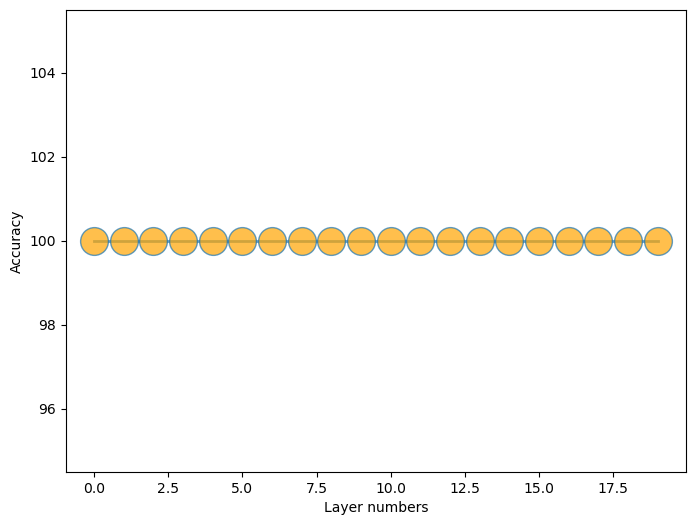

In [15]:
print ("Opt_layer_num =",Accuracy.index(max(Accuracy)), " Accuracy =", max(Accuracy) ,
       "Time =" , np.sum(t[0:Accuracy.index(max(Accuracy))+1]))

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=100)
plt.plot(Accuracy, '-o', ms=20, lw=2, alpha=0.7, mfc='orange')
plt.ylabel('Accuracy')
plt.xlabel('Layer numbers')
plt.show()

In [16]:
Accuracy

[100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0]

In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from deepforest import CascadeForestClassifier


model = CascadeForestClassifier(random_state=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print("\nTesting Accuracy: {:.3f} %".format(acc))

[2023-01-06 22:46:36.650] Start to fit the model:
[2023-01-06 22:46:36.650] Fitting cascade layer = 0 
[2023-01-06 23:17:25.841] layer = 0  | Val Acc = 99.999 % | Elapsed = 1849.192 s
[2023-01-06 23:17:28.994] Fitting cascade layer = 1 
